## Data Exploration

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
df = pd.read_csv('~/Desktop/all_data.csv')
df.shape

### Load Crime Data

In [2]:
df = pd.read_csv('~/Desktop/all_data.csv')
df.shape

(196450, 16)

In [3]:
df.head(2)

,incident_num,category,description,day_of_week,indicent_date,incident_time,pd_district,resolution,address,x,y,location,pd_id,geometry,index_right,neighborhood_name
0,151101177.0,WARRANTS,WARRANT ARREST,Friday,2017-04-21,00:45:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711,-122.403404791479)",1.510000e+13,POINT (-122.4034048 37.77542071),33.0,South of Market
1,141091334.0,BURGLARY,"BURGLARY OF STORE, FORCIBLE ENTRY",Wednesday,2017-03-08,14:28:00,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711,-122.403404791479)",1.410000e+13,POINT (-122.4034048 37.77542071),33.0,South of Market


In [4]:
crime_types = df.groupby('category').count().reset_index()
crime_types = crime_types[['category','incident_num']]
crime_types = crime_types.sort_values(by='incident_num', ascending=False)

In [5]:
# df['incident_time'] =  pd.to_datetime(df['incident_time'], format='%H:%M:%S')
import datetime as dt
df['date_time'] = df['indicent_date'] + ' ' + df['incident_time']
df['date_time'] = df['date_time'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

df['hour_of_day'] = [r.hour for r in df['date_time']]

In [6]:
df.drop(['incident_num','pd_district','location','pd_id','index_right','resolution','address'], axis=1, inplace=True)
df.head(2)

,category,description,day_of_week,indicent_date,incident_time,x,y,geometry,neighborhood_name,date_time,hour_of_day
0,WARRANTS,WARRANT ARREST,Friday,2017-04-21,00:45:00,-122.403405,37.775421,POINT (-122.4034048 37.77542071),South of Market,2017-04-21 00:45:00,0
1,BURGLARY,"BURGLARY OF STORE, FORCIBLE ENTRY",Wednesday,2017-03-08,14:28:00,-122.403405,37.775421,POINT (-122.4034048 37.77542071),South of Market,2017-03-08 14:28:00,14


In [7]:
df['month'] = df['date_time'].apply(lambda x: 
                                    dt.datetime.strftime(x,'%b'))

In [8]:
df.drop(['indicent_date','incident_time'], axis=1, inplace=True)
df.head(2)

,category,description,day_of_week,x,y,geometry,neighborhood_name,date_time,hour_of_day,month
0,WARRANTS,WARRANT ARREST,Friday,-122.403405,37.775421,POINT (-122.4034048 37.77542071),South of Market,2017-04-21 00:45:00,0,Apr
1,BURGLARY,"BURGLARY OF STORE, FORCIBLE ENTRY",Wednesday,-122.403405,37.775421,POINT (-122.4034048 37.77542071),South of Market,2017-03-08 14:28:00,14,Mar


In [9]:
# crime_by_category = df.groupby('category')['description'].count().reset_index()

In [10]:
# crime_by_category.sort_values(by='description', ascending=False)

In [11]:
def rename_categories(input_val):
    if input_val in ['SEX OFFENSES, FORCIBLE','SEX OFFENSES, NON FORCIBLE','PORNOGRAPHY/OBSCENE MAT','PROSTITUTION']:
        return 'SEX OFFENSES'
    elif input_val in ['BAD CHECKS','EMBEZZLEMENT','FORGERY/COUNTERFEITING','FRAUD']:
        return 'WHITE COLLAR'
    elif input_val in ['DISORDERLY CONDUCT','DRUNKENNESS','DRIVING UNDER THE INFLUENCE']:
        return 'DRUNK AND DISORDERLY'
    elif input_val in ['ROBBERY','ASSAULT']:
        return 'ROBBERY/ASSAULT'
    elif input_val in ['TREA','LOITERING']:
        return 'LOITERING'
    else:
        return input_val
df = df.applymap(rename_categories)

In [12]:
crime_by_category = df.groupby('category')['description'].count().reset_index()
crime_by_category.sort_values(by='description', ascending=False)

,category,description
9,LARCENY/THEFT,53809
14,OTHER OFFENSES,25495
13,NON-CRIMINAL,22925
16,ROBBERY/ASSAULT,21852
24,VANDALISM,11533
25,VEHICLE THEFT,8346
22,SUSPICIOUS OCC,7757
2,BURGLARY,7641
26,WARRANTS,7335
12,MISSING PERSON,5562


In [13]:
df.head()

,category,description,day_of_week,x,y,geometry,neighborhood_name,date_time,hour_of_day,month
0,WARRANTS,WARRANT ARREST,Friday,-122.403405,37.775421,POINT (-122.4034048 37.77542071),South of Market,2017-04-21 00:45:00,0,Apr
1,BURGLARY,"BURGLARY OF STORE, FORCIBLE ENTRY",Wednesday,-122.403405,37.775421,POINT (-122.4034048 37.77542071),South of Market,2017-03-08 14:28:00,14,Mar
2,TRESPASS,TRESPASSING,Saturday,-122.458680,37.748155,POINT (-122.4586802 37.74815547),Twin Peaks,2017-01-14 13:10:00,13,Jan
3,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Thursday,-122.403405,37.775421,POINT (-122.4034048 37.77542071),South of Market,2017-01-19 08:45:00,8,Jan
4,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Thursday,-122.392350,37.792645,POINT (-122.3923498 37.79264509),Financial District/South Beach,2017-01-19 16:08:00,16,Jan


In [14]:
# import pickle
# income_data = pickle.load(open('median_income_data.pkl', 'rb'))

In [15]:
# income_data.drop(['latitude','longitude','geometry'], axis=1, inplace=True)
# income_data

In [16]:
# new_df = df.merge(income_data, left_on='neighborhood_name', right_on='nhood', how='left')
# new_df.drop(['nhood','index_right'], axis=1, inplace=True)

In [17]:
# mask = new_df['zip_code'].isnull()
# new_df[mask]

In [18]:
data_set = df.drop(['description','x','y','geometry','date_time'], axis=1)

In [19]:
data_set.sample(5)

,category,day_of_week,neighborhood_name,hour_of_day,month
102851,LARCENY/THEFT,Saturday,South of Market,19,Aug
28508,OTHER OFFENSES,Sunday,Mission,11,Apr
52270,OTHER OFFENSES,Tuesday,Pacific Heights,14,Mar
49253,VEHICLE THEFT,Saturday,West of Twin Peaks,11,Jan
29782,ROBBERY/ASSAULT,Thursday,Mission,0,Apr


In [20]:
data_set = pd.get_dummies(data_set, columns=['day_of_week','neighborhood_name','month'])

In [21]:
data_set.head()

,category,hour_of_day,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,neighborhood_name_Bayview Hunters Point,...,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,WARRANTS,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,BURGLARY,14,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,TRESPASS,13,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,LARCENY/THEFT,8,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,NON-CRIMINAL,16,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [22]:
data_set.columns

Index(['category', 'hour_of_day', 'day_of_week_Friday', 'day_of_week_Monday',
       'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday',
       'day_of_week_Tuesday', 'day_of_week_Wednesday',
       'neighborhood_name_Bayview Hunters Point',
       'neighborhood_name_Bernal Heights',
       'neighborhood_name_Castro/Upper Market', 'neighborhood_name_Chinatown',
       'neighborhood_name_Excelsior',
       'neighborhood_name_Financial District/South Beach',
       'neighborhood_name_Glen Park', 'neighborhood_name_Golden Gate Park',
       'neighborhood_name_Haight Ashbury', 'neighborhood_name_Hayes Valley',
       'neighborhood_name_Inner Richmond', 'neighborhood_name_Inner Sunset',
       'neighborhood_name_Japantown', 'neighborhood_name_Lakeshore',
       'neighborhood_name_Lincoln Park', 'neighborhood_name_Lone Mountain/USF',
       'neighborhood_name_Marina', 'neighborhood_name_McLaren Park',
       'neighborhood_name_Mission', 'neighborhood_name_Mission Bay',
    

In [23]:
y = data_set['category']
X = data_set.drop('category', axis=1)

In [24]:
def baseline_predictor(input_data):
    predictor_dict = dict(input_data.value_counts())
    most_freq = max(predictor_dict, key=predictor_dict.get)
    return [most_freq for i in range(len(input_data))]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=4444)

In [35]:
data_set.sample(20)

,category,hour_of_day,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,neighborhood_name_Bayview Hunters Point,...,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
18099,SUSPICIOUS OCC,12,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
9295,OTHER OFFENSES,16,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
144256,LARCENY/THEFT,19,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
90568,VANDALISM,14,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
163791,LARCENY/THEFT,11,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
153479,LARCENY/THEFT,19,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
22979,NON-CRIMINAL,14,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
128724,VANDALISM,21,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
182631,LARCENY/THEFT,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
137016,NON-CRIMINAL,14,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [44]:
knn_scores = []

for i in range(1, 21):
    
    # create and fit model to training data
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    # predict y values agaisnt test data
    y_pred_test = knn.predict(X_test)
    score = accuracy_score(y_test, y_pred_test)
    
    # store scores
    tup = (i, score)
    print(tup)
    knn_scores.append(tup)
    
knn_scores = dict(knn_scores)

(1, 0.18613726987358956)
(2, 0.21496564011198779)
(3, 0.22224484601679817)
(4, 0.22156613217951981)
(5, 0.22677526088063121)
(6, 0.23459743785526427)
(7, 0.24155425468736744)
(8, 0.24732332230423348)
(9, 0.25027572749639432)
(10, 0.2521930940867057)
(11, 0.25482311020615933)
(12, 0.25606176295919231)
(13, 0.25741919063374907)
(14, 0.25825061508441505)
(15, 0.26145753796555526)
(16, 0.26267922287265633)
(17, 0.26403665054721304)
(18, 0.26437600746585221)
(19, 0.26488504284381098)
(20, 0.26556375668108934)


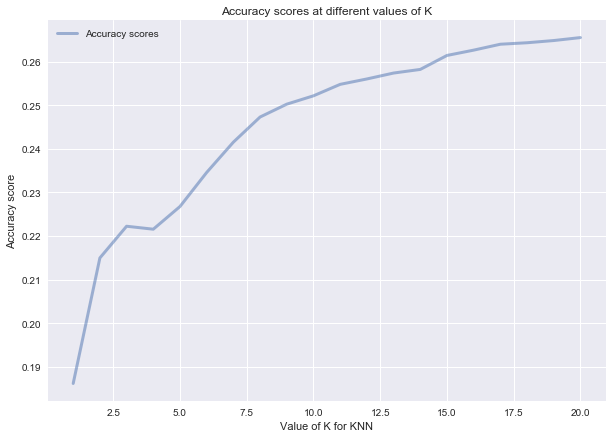

In [45]:
plt.figure(figsize=(10, 7))
plt.plot(list(knn_scores.keys()) , list(knn_scores.values()), alpha = 0.5, linewidth = 3.0, label = 'Accuracy scores')
plt.title('Accuracy scores at different values of K')
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy score')
plt.legend()

In [ ]:
knn_scores = []

for i in range(21, 101):
    
    # create and fit model to training data
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    # predict y values agaisnt test data
    y_pred_test = knn.predict(X_test)
    score = accuracy_score(y_test, y_pred_test)
    
    # store scores
    tup = (i, score)
    print(tup)
    knn_scores.append(tup)
    
knn_scores = dict(knn_scores)

(21, 0.26729447696614916)
(22, 0.26775260880631202)
(23, 0.26790531941969969)
(24, 0.26885551879188935)
(25, 0.27072198184440488)
(26, 0.27058623907694918)
(27, 0.27034868923390176)
(28, 0.27056927123101721)
(29, 0.2720963773648935)
(30, 0.27318231950453892)
(31, 0.27355561211504198)
(32, 0.27285993043183165)
(33, 0.27316535165860695)
(34, 0.27369135488249768)
(35, 0.27340290150165436)
(36, 0.2737083227284296)
(37, 0.27477729702214304)
(38, 0.27523542886230595)
(39, 0.27582930346992451)
(40, 0.27615169254263172)
(41, 0.27535420378382963)
(42, 0.27616866038856369)
(43, 0.27620259608042758)
(44, 0.27591414269958431)
(45, 0.27688130991770593)
(46, 0.27722066683634511)
(47, 0.27723763468227708)
(48, 0.27713582760668531)
(49, 0.27723763468227708)
(50, 0.27671163145838634)
(51, 0.27706795622295749)
(52, 0.27759395944684823)
(53, 0.27810299482480699)
(54, 0.27796725205735134)
(55, 0.27810299482480699)
(56, 0.27784847713582761)
(57, 0.27803512344107917)
(58, 0.27845931958937814)
(59, 0.2781878

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(list(knn_scores.keys()) , list(knn_scores.values()), alpha = 0.5, linewidth = 3.0, label = 'Accuracy scores')
plt.title('Accuracy scores at different values of K')
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy score')
plt.legend()